In [1]:
# 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭
#6만장 (학습용 5만장, 검증용 1만장)
#32x32 이미지
#32x32x3 RGB 컬러 이미지
# http://www.cs.toronto.edu/~kriz/cifar.html

In [41]:
from tensorflow.keras import datasets, utils

def make_data():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    # 원 핫 인코딩 처리
    y_train = utils.to_categorical(y_train, 10)
    y_test = utils.to_categorical(y_test, 10)
    # 데이터 정규화
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    return (X_train, y_train), (X_test, y_test)

In [59]:
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout

# def make_model():
#     model = Sequential()
#     model.add(Conv2D(32,(3,3), padding='same',
#                      input_shape=X_train.shape[1:], activation='relu'))
#     model.add(Conv2D(32, (3,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
#     model.add(Conv2D(64, (3,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dense(10, activation='softmax'))

#     # 학습률 0.0001, decay 학습속돌를 감소시키는옵션
#     # opt=optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)
#     opt=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001,decay=1e-6)
#     model.compile(loss='categorical_crossentropy',
#                   optimizer=opt, metrics=['accurcay'])
#     return model

def make_model():
    model=Sequential()
    #padding="same" 출력크기를 입력크기와 같게 유지
    model.add(Conv2D(32,(3,3),padding="same",
                     input_shape=X_train.shape[1:],activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))

    #학습률 0.0001, decay 학습속도를 감소시키는 옵션

    # opt=optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001,decay=1e-6)
    model.compile(loss="categorical_crossentropy",
                 optimizer=opt,metrics=["accuracy"])

    return model


In [60]:
a = isinstance(1, int) # True
b = isinstance(1.2, float) # True

In [73]:
def plot_loss(history, title=None):
    # history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    # 타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [62]:
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history=history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [63]:
(X_train, y_train), (X_test, y_test) = make_data()

In [64]:
X_train.shape

(50000, 32, 32, 3)

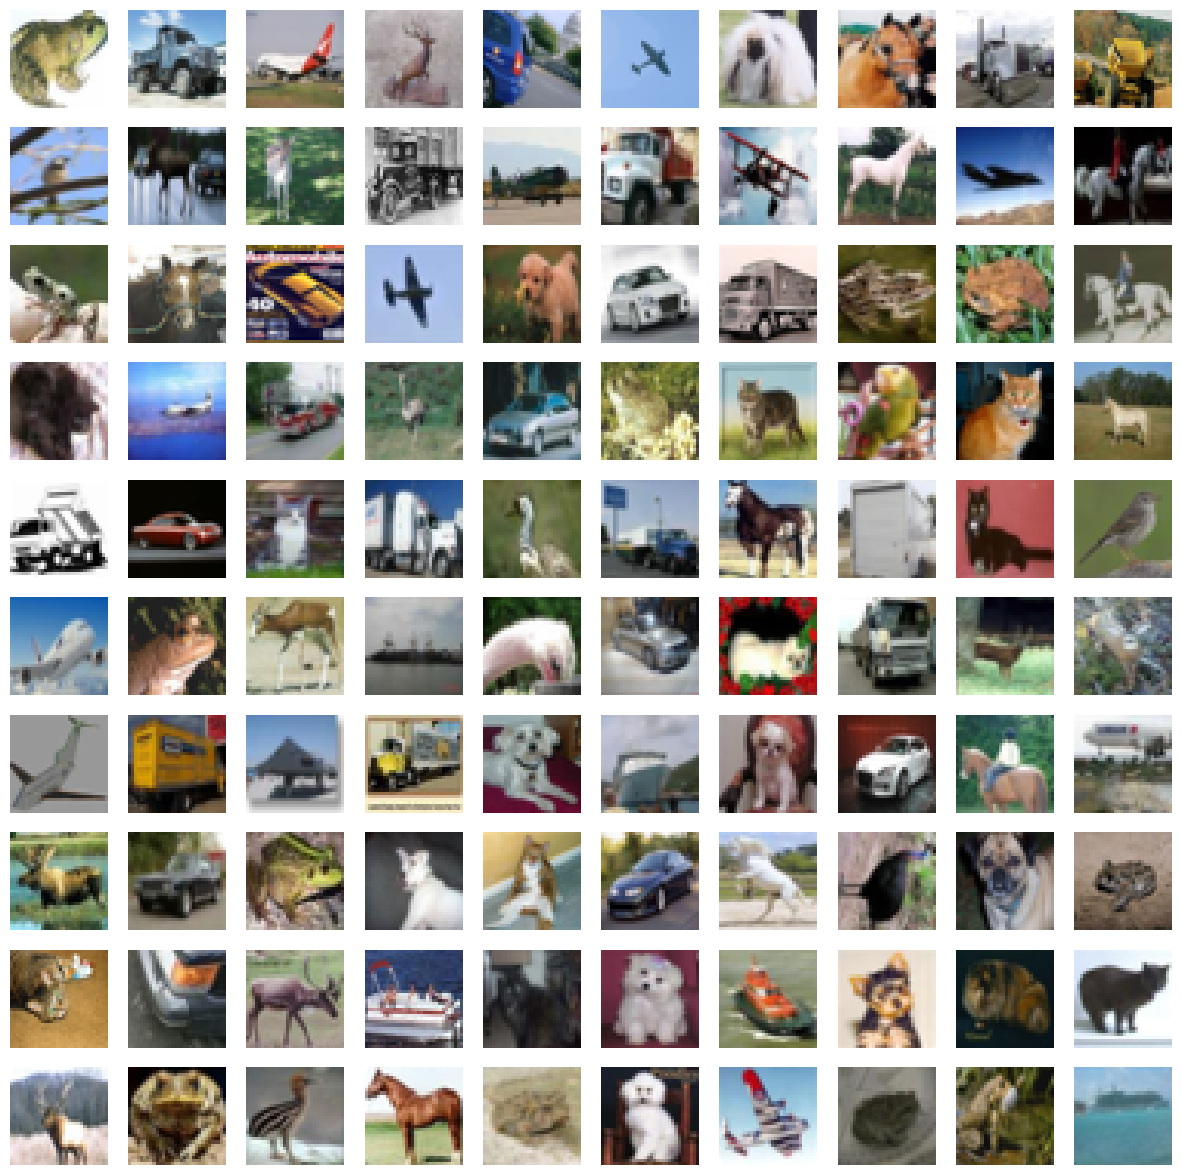

In [65]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes1 = plt.subplots(10, 10, figsize=(15,15))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [66]:
# 모델 생성
model = make_model()

In [67]:
# 학습 시간이 오래걸림
with tf.device('/GPU:0'):
    history=model.fit(X_train,y_train,epochs=3,batch_size=32,validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 102s 81ms/step - loss: 1.7604 - accuracy: 0.3618 - val_loss: 1.6090 - val_accuracy: 0.4193
Epoch 2/3
1250/1250 [==============================] - 123s 98ms/step - loss: 1.4805 - accuracy: 0.4676 - val_loss: 1.3786 - val_accuracy: 0.5055
Epoch 3/3
1250/1250 [==============================] - 125s 100ms/step - loss: 1.3438 - accuracy: 0.5232 - val_loss: 1.2700 - val_accuracy: 0.5524


In [68]:
# 성능평가 
performance_test = model.evaluate(X_test, y_test, batch_size=128)
print(performance_test)

79/79 [==============================] - 3s 32ms/step - loss: 1.2594 - accuracy: 0.5516
[1.2594345808029175, 0.5515999794006348]


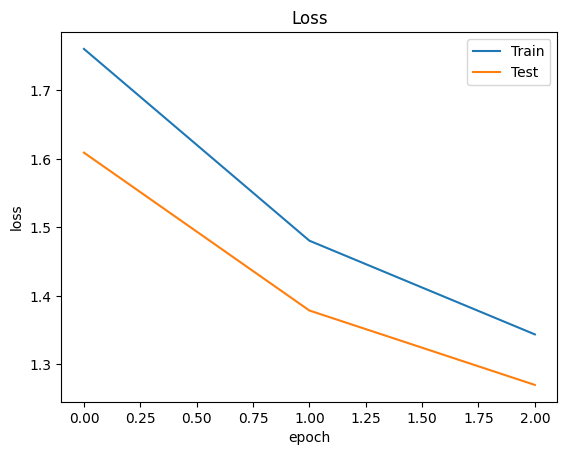

In [74]:
import matplotlib

plot_loss(history, 'Loss')
plt.show()

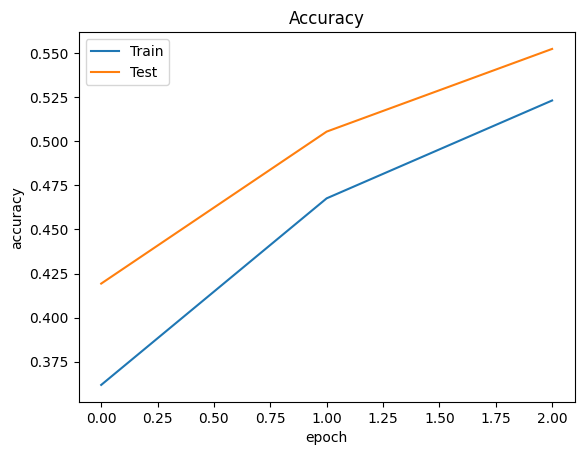

In [75]:
plot_acc(history, 'Accuracy')
plt.show()

In [76]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
confusion_matrix(np.argmax(y_test, axis=1), y_pred)


313/313 [==============================] - 3s 9ms/step


array([[537,  62,  69,  18,  14,   9,  17,  24, 200,  50],
       [ 22, 764,   3,   3,   2,   7,  10,  20,  69, 100],
       [ 69,  33, 365,  49,  89, 120,  81, 123,  44,  27],
       [ 16,  37,  62, 266,  43, 276,  99, 129,  39,  33],
       [ 30,  26, 125,  49, 366,  92,  91, 178,  29,  14],
       [ 15,  18,  61,  86,  39, 560,  36, 153,  21,  11],
       [  5,  24,  55,  52,  51,  53, 648,  64,  17,  31],
       [ 13,  16,  23,  33,  33,  88,  20, 715,  15,  44],
       [ 95,  77,  13,   8,   3,   5,   4,  20, 740,  35],
       [ 30, 222,   8,   8,   7,  14,  21,  41,  94, 555]], dtype=int64)

In [77]:
model.save('c:/work/data/cifar/cifar.h5')

c:\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      